# **Problem Statement**

Early and accurate detection of kidney diseases such as cysts, stones, and tumors is essential for effective treatment. Manual analysis of medical images is time-consuming and prone to human error. This project aims to develop a machine learning–based system that automatically analyzes kidney medical images and classifies them into Cyst, Stone, Tumor, or Normal categories to support reliable and efficient diagnosis.

# **Target Feature**
The target feature represents the type of kidney condition detected from a medical image.

**Target Classes :**

Cyst

Stone

Tumor

Normal

# **Importing Required Libraries**

In [ ]:
# Mounting google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [36]:
# importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imutils import paths
from google.colab.patches import cv2_imshow
import cv2

# **Image Preprocessing**

In [ ]:
# image preprocessing
def image_preprocessing(path, label):
    images_paths = list(paths.list_images(path))
    image_num_data = []

    for img_path in images_paths:
        image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
        image = cv2.resize(image, (64, 64), interpolation=cv2.INTER_AREA)
        image = image.astype("float32") / 255.0
        image_num_data.append(image.flatten())

    df = pd.DataFrame(image_num_data)
    df["target"] = label
    return df

# **Training Data Preparation**

In [ ]:
# Train Data
Cyst_train = image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/train/Cyst","Cyst")
Normal_train = image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/train/Normal","Normal")
Stone_train = image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/train/Stone","Stone")
Tumor_train = image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/train/Tumor","Tumor")

In [ ]:
# Assigning Targets to Every Disease
Cyst_train["target"] = "Cyst"
Normal_train["target"] = "Normal"
Stone_train["target"] = "Stone"
Tumor_train["target"] = "Tumor"

In [ ]:
# checking Shapes of DataFrames before merging
for i in [Cyst_train,Normal_train,Stone_train,Tumor_train]:
  print(f"{i.shape}")

(1000, 4097)
(1000, 4097)
(1000, 4097)
(1000, 4097)


In [ ]:
# Concating Dataframes to get Train data
train = pd.concat([Cyst_train,
                   Normal_train,
                   Stone_train,
                   Tumor_train])
print(train.shape)

(4000, 4097)


In [ ]:
# Selecting target and input variable from train_data
y_train = train["target"]
X_train = train.drop(columns="target")

In [ ]:
print(y_train.shape)
print(X_train.shape)

(4000,)
(4000, 4096)


In [ ]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,...,4086,4087,4088,4089,4090,4091,4092,4093,4094,4095
0,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,...,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902
1,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
2,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,...,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902,0.054902
3,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,...,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824,0.058824
4,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,...,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765,0.011765


# **Testing  Data Preparation**

In [ ]:
# Test Data
Cyst_test = image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/test/Cyst","Cyst")
Normal_test = image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/test/Normal","Normal")
Stone_test= image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/test/Stone","Stone")
Tumor_test = image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/test/Tumor","Tumor")

In [ ]:
# Assigning Targets to Every Disease
Cyst_test["target"] = "Cyst"
Normal_test["target"] = "Normal"
Stone_test["target"] = "Stone"
Tumor_test["target"] = "Tumor"

In [ ]:
# checking Shapes of DataFrames before merging
for i in [Cyst_test,Normal_test,Stone_test,Tumor_test]:
  print(f"{i.shape}")

(200, 4097)
(200, 4097)
(200, 4097)
(200, 4097)


In [ ]:
# Concating Dataframes to get Test data
test = pd.concat([Cyst_test,Normal_test,Stone_test,Tumor_test])
print(test.shape)

(800, 4097)


In [ ]:
# Selecting target and input variable from test_data
y_test = test["target"]
X_test = test.drop(columns = "target")

In [ ]:
print(y_test.shape)
print(X_test.shape)

(800,)
(800, 4096)


In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4000, 4096)
(4000,)
(800, 4096)
(800,)


# **Validation Data Preparation**

In [ ]:
# Validation Data
Cyst_valid = image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/validation/Cyst","Cyst")
Normal_valid = image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/validation/Normal","Normal")
Stone_valid= image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/validation/Stone","Stone")
Tumor_valid= image_preprocessing("/content/drive/MyDrive/Colab Notebooks/Kidney_Colorized_CT/validation/Tumor","Tumor")

In [ ]:
# Assigning Targets to Every Disease
Cyst_valid["target"] = "Cyst"
Normal_valid["target"] = "Normal"
Stone_valid["target"] = "Stone"
Tumor_valid["target"] = "Tumor"

In [ ]:
# checking Shapes of DataFrames before merging
for i in [Cyst_valid,Normal_valid,Stone_valid,Tumor_valid]:
  print(f"{i.shape}")

(200, 4097)
(200, 4097)
(200, 4097)
(200, 4097)


In [ ]:
# Combining entire Validation data into a single dataframe
valid = pd.concat([Cyst_valid,Normal_valid,Stone_valid,Tumor_valid])
print(valid.shape)

(800, 4097)


In [ ]:
# selecting target and input variable from validation_data
y_valid = valid["target"]
X_valid = valid.drop(columns = "target")

In [ ]:
print(y_valid.shape)
print(X_valid.shape)

(800,)
(800, 4096)


In [ ]:
print(X_valid.shape)
print(y_valid.shape)
print(X_valid.shape)
print(y_valid.shape)

(800, 4096)
(800,)
(800, 4096)
(800,)


# **Model Building**

## **1.Naive_Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

param_grid = {
    "var_smoothing": [1e-12, 1e-10, 1e-9, 1e-8, 1e-7]
}

grid = GridSearchCV(
    estimator=GaussianNB(),
    param_grid=param_grid,
    cv=5,
    scoring="accuracy",
    return_train_score=True
)

grid.fit(X_train, y_train)

# Best params & CV score
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# Train accuracy on full training data
best_model = grid.best_estimator_
train_acc = best_model.score(X_train, y_train)

# Test accuracy on unseen data
test_acc = best_model.score(X_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)

Best parameters: {'var_smoothing': 1e-12}
Best CV accuracy: 0.42124999999999996
Train accuracy: 0.60925
Test accuracy: 0.6125


In [ ]:
# Fitting GaussianNB model
from sklearn.naive_bayes import GaussianNB

nb_model = GaussianNB(var_smoothing=1e-12)

nb_model.fit(X_train,y_train)

GaussianNB(var_smoothing=1e-12)

### **Test_data Accuracy**

Test Accuracy : 0.6125

Confusion Matrix : 
 [[136  38   2  24]
 [ 13 143  15  29]
 [ 41  57  70  32]
 [ 22  29   8 141]]

Classfication Report: 
               precision    recall  f1-score   support

        Cyst       0.64      0.68      0.66       200
      Normal       0.54      0.71      0.61       200
       Stone       0.74      0.35      0.47       200
       Tumor       0.62      0.70      0.66       200

    accuracy                           0.61       800
   macro avg       0.63      0.61      0.60       800
weighted avg       0.63      0.61      0.60       800


Confusion Matrix Display: 


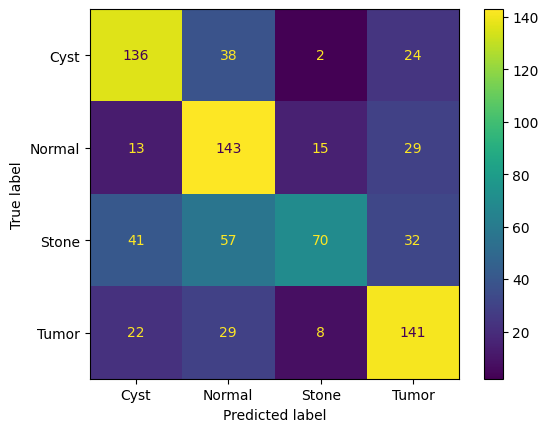

In [ ]:
# Importing evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

y_pred = nb_model.predict(X_test)

# Evaluating overall model accuracy
print("Test Accuracy :",accuracy_score(y_test,y_pred))
print()

# Displaying confusion matrix values
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print()

# Displaying detailed classification report
print("Classfication Report: \n",classification_report(y_test,y_pred))
print()

#Plot confusion matrix for visual understanding
print("Confusion Matrix Display: \n",ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

### **Validation_data accuracy**

valid_data_accuracy: 0.6225

classification_report:               precision    recall  f1-score   support

        Cyst       0.70      0.71      0.71       200
      Normal       0.55      0.68      0.61       200
       Stone       0.70      0.43      0.53       200
       Tumor       0.59      0.67      0.63       200

    accuracy                           0.62       800
   macro avg       0.63      0.62      0.62       800
weighted avg       0.63      0.62      0.62       800


ConfusionMatrixDisplay: <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x78faf2984470>


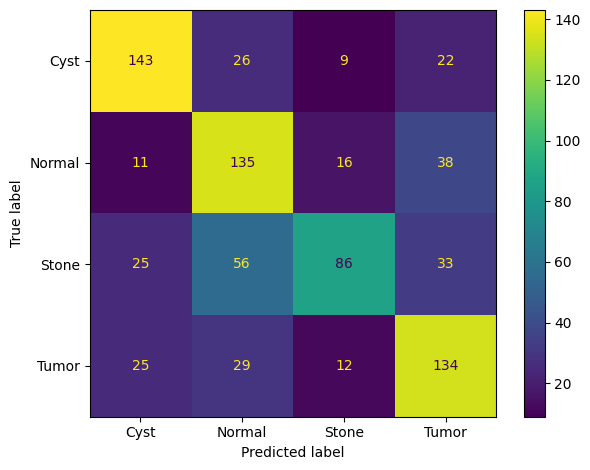

In [ ]:
# Displaying accuracy_score,classification_report,ConfusionMatrixDisplay
from sklearn.metrics import ConfusionMatrixDisplay,classification_report,accuracy_score

y_pred = nb_model.predict(X_valid)

print("valid_data_accuracy:",accuracy_score(y_valid,y_pred))
print()
print("classification_report:",classification_report(y_valid,y_pred))
print()
print("ConfusionMatrixDisplay:",ConfusionMatrixDisplay.from_predictions(y_valid,y_pred))
plt.tight_layout()

## **Naive Bayes (GaussianNB) – Observations :**

* The model shows consistent performance across training (~61%), testing (~61%), and validation (~62%), indicating stable learning without overfitting.

* Class-wise results reveal better recall for Cyst and Tumor, while Stone remains the most challenging class with frequent misclassification.

* The confusion matrix indicates overlap mainly between Stone and Normal classes, impacting overall accuracy.

* Overall, Gaussian Naive Bayes delivers moderate and stable performance, limited by its assumption of feature independence.

## **2.Decision Tree Classifier**

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Hyperparameter grid
param_grid = {
    "criterion": ["gini","entropy"],
    "max_depth": list(range(1,20)),
    #"min_samples_split": [2, 5, 10],
    #"min_samples_leaf": [1, 2, 5]
}

grid = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42,class_weight="balanced"),
    param_grid=param_grid,
    cv=3,
    scoring="accuracy",
    return_train_score=True
)

# Fit on training data
grid.fit(X_train, y_train)

# Best params & CV score
print("Best parameters:", grid.best_params_)
print("Best CV accuracy:", grid.best_score_)

# Best model
best_model = grid.best_estimator_

# Train accuracy
train_acc = best_model.score(X_train, y_train)

# Test accuracy
test_acc = best_model.score(X_test, y_test)

print("Train accuracy:", train_acc)
print("Test accuracy:", test_acc)


Best parameters: {'criterion': 'gini', 'max_depth': 11}
Best CV accuracy: 0.4330061150969901
Train accuracy: 0.972
Test accuracy: 0.89125


In [ ]:
#Importing DecisionTree classifier
from sklearn.tree import DecisionTreeClassifier

#Creating pipeline and fitting the model
dt=DecisionTreeClassifier(max_depth=11,criterion="gini")
dt.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=11)

### **Test_data Accuracy**

Test Accuracy : 0.89

Confusion Matrix : 
 [[177  10  10   3]
 [  5 175  14   6]
 [  8   8 178   6]
 [  4  13   1 182]]

Classfication Report: 
               precision    recall  f1-score   support

        Cyst       0.91      0.89      0.90       200
      Normal       0.85      0.88      0.86       200
       Stone       0.88      0.89      0.88       200
       Tumor       0.92      0.91      0.92       200

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800


Confusion Matrix Display: 


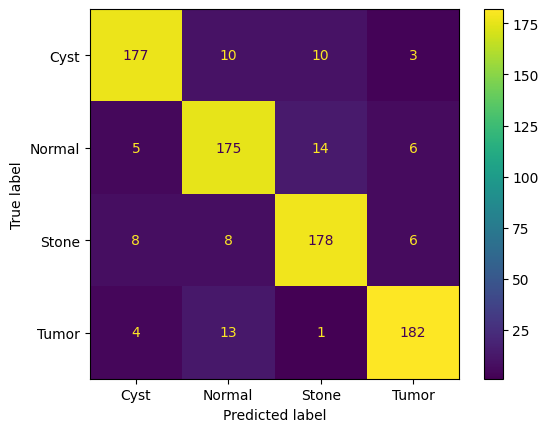

In [ ]:
# Importing evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

y_pred = dt.predict(X_test)

# Evaluating overall model accuracy
print("Test Accuracy :",accuracy_score(y_test,y_pred))
print()

# Displaying confusion matrix values
print("Confusion Matrix : \n",confusion_matrix(y_test,y_pred))
print()

# Displaying detailed classification report
print("Classfication Report: \n",classification_report(y_test,y_pred))
print()

#Plot confusion matrix for visual understanding
print("Confusion Matrix Display: \n",ConfusionMatrixDisplay.from_predictions(y_test,y_pred))

### **Validation_data Accuracy**

Validation Accuracy : 0.9075

Confusion Matrix : 
 [[184   3   6   7]
 [  8 175  10   7]
 [  6   4 185   5]
 [  8   7   3 182]]

Classfication Report: 
               precision    recall  f1-score   support

        Cyst       0.89      0.92      0.91       200
      Normal       0.93      0.88      0.90       200
       Stone       0.91      0.93      0.92       200
       Tumor       0.91      0.91      0.91       200

    accuracy                           0.91       800
   macro avg       0.91      0.91      0.91       800
weighted avg       0.91      0.91      0.91       800


Confusion Matrix Display: 


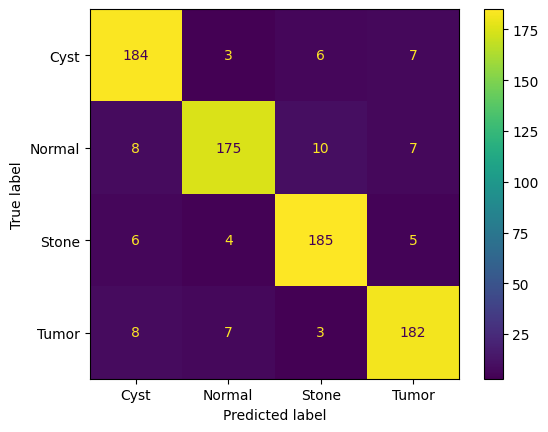

In [ ]:
# Importing evaluation metrics
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay

y_pred =dt.predict(X_valid)

# Evaluating overall model accuracy
print("Validation Accuracy :",accuracy_score(y_valid,y_pred))
print()

# Displaying confusion matrix values
print("Confusion Matrix : \n",confusion_matrix(y_valid,y_pred))
print()

# Displaying detailed classification report
print("Classfication Report: \n",classification_report(y_valid,y_pred))
print()

#Plot confusion matrix for visual understanding
print("Confusion Matrix Display: \n",ConfusionMatrixDisplay.from_predictions(y_valid,y_pred))

## **Decision Tree Classifier – Observations:**

* The model demonstrates strong and consistent performance, achieving ~97% training accuracy, ~89–90% test accuracy, and ~90% validation accuracy, indicating good generalization with mild overfitting.

* Hyperparameter tuning using the Gini criterion and optimal tree depth significantly improved model effectiveness.

* Class-wise evaluation shows high precision, recall, and F1-scores across all classes, with particularly strong performance for Stone and Tumor categories.

* The confusion matrix reflects minimal misclassification, confirming effective class separation.

* Overall, the Decision Tree classifier proves to be a robust and reliable model for this multi-class medical image classification task.

In [38]:
import pickle

with open('dt.pkl', 'wb') as file:
    pickle.dump(dt, file)

# **Conclusion**

The kidney medical image dataset used in this project provides a well-structured and balanced representation of four classes: Cyst, Stone, Tumor, and Normal. With clearly separated training, testing, and validation splits, the dataset supports reliable model training and unbiased performance evaluation. The extracted image features effectively capture meaningful patterns required for multi-class classification. Overall, this dataset is well-suited for developing and evaluating machine learning models for kidney disease detection from medical images.